# TensorFlow - A Simple Neural Net with TF

## Packages & Imports

In [1]:
%matplotlib inline

import math
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

np.random.seed(1)

## Example: Compute Loss For 1 Training Example

The loss function we assume here is:
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [2]:
y_hat = tf.constant(36, name='y_hat') ## Declare a constant y-hat
y = tf.constant(39, name='y') ## Declare another constant y

loss = tf.Variable((y-y_hat)**2, name='loss') ## Implement the loss function as described above

init = tf.global_variables_initializer() ## Create a loss variable

with tf.Session() as sess: ## Create Session
    sess.run(init)         ## Run session with init and output the initialized loss variable
    print(sess.run(loss))  ## Print loss

9


### A Simpler Example - Basic Math

TensorFlow creates tensors (variables) but does not compute output till sessions are initialized

In [3]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


As we expected, the print output of c is a tensor that contains the multiply operation. We need to create a session, run the session to see our expected output

In [4]:
sess = tf.Session()
print(sess.run(c))

10


## Placeholders

A placeholder is just another varibale whose value we can assign later: ie when the session is run. We assign the value with the 'feed_dict' parameter

In [5]:
x = tf.placeholder(tf.int64, name='x')


sess = tf.Session()
print(sess.run(2 * x, feed_dict={x:10}))
sess.close()

20


## A Linear Function
Compute a linear function:
\begin{equation}
Y = WX + b
\end{equation}

Where W and X are random matrices and b is a random vector

Lets assume the following shapes for W, X and b:
W - (4,3)
X - (3,1)
b - (4,1)

Use numpy for random matrices and tensorflow to create tensors for the created matrices/vectors

In [6]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ## Tensor Constants
    X = tf.constant(np.random.randn(3,1), name = 'X')
    W = tf.constant(np.random.randn(4,3), name = 'W')
    b = tf.constant(np.random.randn(4,1), name = 'b')
    
    ## Tensor Function/Operation
    Y = tf.add(tf.matmul(W,X), b)
    
    ## Create Session and Run
    sess = tf.Session()
    
    ## Store result from session
    result = sess.run(Y)
    
    ## Close Session
    sess.close()
    
    return result

In [7]:
print('Result = '+ str(linear_function()))

Result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


## Sigmoid Function

TensorFlow has built in functions we use in our deeplearning applications like sigmoid, softmax, relu etc etc

In [8]:
def sigmoid(z):
    """
    Computes sigmoid of z
    
    Arguments:
    z -- input, vector or scalar
    
    Returns:
    result -- the sigmoid of z
    """
    
    x = tf.placeholder(tf.float32, name='x')
    
    sigmoid = tf.sigmoid(x)
    
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x:z})
        sess.close()
    
    return result

In [9]:
print("sigmoid(0): "+ str(sigmoid(0)))
print("sigmoid(2): "+ str(sigmoid(2)))

sigmoid(0): 0.5
sigmoid(2): 0.880797


## Compute The Cross-Entropy Cost Function
With TensorFlow you can compute the cross entropy cost function with just one line of code. Instead computing each step of the equation, let TF do the heavy lifting

In [10]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ## Create Placeholders for logits(z) and labels(y)
    z = tf.placeholder(tf.float32, name = 'z')
    y = tf.placeholder(tf.float32, name = 'y')
    
    ## Compute Sigmoid Cross-Entropy Cost
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)
    
    ## Create Session, Run & Close
    sess = tf.Session()
    
    cost = sess.run(cost, feed_dict={z:logits, y:labels})
    
    sess.close()
    
    return cost

In [11]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
labels = np.array([0,0,1,1])
cost = cost(logits, labels)
print("cost = "+str(cost))

cost = [ 1.00538719  1.03664088  0.41385433  0.39956614]


## One Hot Encoding
Many a time we have a vector of classes, with each class represented as a number or text. To simplify our operations we can convert that vector into a one hot matrix

In [12]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    C = tf.constant(C, name='C')
    
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)
    
    with tf.Session() as sess:
        one_hot = sess.run(one_hot_matrix)
        sess.close()
    
    return one_hot

In [13]:
labels = np.array([1,2,3,0,2,1])
C = 4
one_hot = one_hot_matrix(labels, C)
print(one_hot)

[[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


## Initializing Matrices and Vectors
TensorFlow is built in support for initialization as well. tf.ones() for ones and tf.zeros() for zeros

In [14]:
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ones = tf.ones(shape)
    with tf.Session() as sess:
        output = sess.run(ones)
        sess.close()
    
    return output

def zeros(shape):
    """
    Creates an array of zeros of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only zeros
    """
    
    zeros = tf.zeros(shape)
    with tf.Session() as sess:
        output = sess.run(zeros)
        sess.close()
    
    return output

In [15]:
print("Ones: "+str(ones([3])))
print("Zeros: "+str(zeros([2,2])))

Ones: [ 1.  1.  1.]
Zeros: [[ 0.  0.]
 [ 0.  0.]]


# Building A Simple Net With What We Know

y = 2


X-Train (1080, 64, 64, 3)
Y_Train (1, 1080)
[[0 0 0 5 1 0 3 1 5 1 5 1 3 1 1 3 5 4 0 4 5 4 2 5 3 5 4 2 1 2 3 1 0 3 1 1 0
  4 2 3 0 3 0 2 3 1 2 2 0 3 4 1 2 0 4 0 4 0 4 4 5 5 2 4 4 5 0 1 3 5 0 4 1 2
  3 4 3 5 1 5 2 0 1 4 2 4 4 1 4 5 5 0 0 5 5 5 3 3 5 2 2 2 0 2 5 3 0 2 3 4 1
  3 2 4 2 2 1 3 1 3]]
X_Test (120, 64, 64, 3)
Y_Test (1, 120)


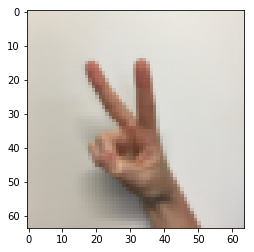

In [16]:
## Load the dataset and take a peek at some of the data

X_train_orig, Y_train_orig,X_test_orig, Y_test_orig, classes = load_dataset()

## Example of A picture in the dataset
index = 4
plt.imshow(X_train_orig[index])
print ("y = "+str(np.squeeze(Y_train_orig[:,index])))
print("\n")

## Shapes of our data
print("X-Train", str(X_train_orig.shape))
print("Y_Train", str(Y_train_orig.shape))
print(Y_test_orig)
print("X_Test", str(X_test_orig.shape))
print("Y_Test", str(Y_test_orig.shape))

We see we have 1080 train images and 120 test images, each 64x64 and 3 color channels
Our label vectors for each correspond to the number of training and test examples


As usual we need to flatten/unroll our images and normalize them by dividing by 255 to get more manageable numbers. In addtion we convert each label to a one-hot vector

In [17]:
## Unroll Images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

## Normalize Images
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

## Convert Labels to One-Hot
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print("X-Train-Flat: "+str(X_train.shape))
print("X-Test-Flat: "+str(X_test.shape))
print("\n")
print("Y-Train-OneHot :"+str(Y_train.shape))
print("Y-Test-OneHot: "+str(Y_test.shape))

print(Y_test)

X-Train-Flat: (12288, 1080)
X-Test-Flat: (12288, 120)


Y-Train-OneHot :(6, 1080)
Y-Test-OneHot: (6, 120)
[[ 1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.
   0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.

The new image shapes represent the unrolled images 12288 pixel inputs = (64*64*3) and 1080/120 examples
The new label shapes represent the one-hot vectors 6 possible labels for each example 1080/120

## Helper Functions To Build The Model

The model we are building will have the following layers 
Linear -> ReLU -> Linear -> ReLU -> Linear -> Softmax

### Create Placeholders

We need to create placeholder for X and Y. We use these to pass in training data

In [18]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    """
    
    X = tf.placeholder(tf.float32, [n_x, None], name='X')
    Y = tf.placeholder(tf.float32, [n_y, None], name='Y')
    
    ## We use None in when declaring the shape because the number of training examples and test examples are
    ## different, this makes our function a little more flexible
    
    return X, Y

In [19]:
X, Y = create_placeholders(12288, 6)

print("X = "+str(X))
print("Y = "+str(Y))


X = Tensor("X_1:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y:0", shape=(6, ?), dtype=float32)


This is a good sanity check, we expect X & Y to be tensors of 12288, None and 6, None shapes

## Initialize Parameters
We need to create a dictionary of parameters. We will use Xavier Initialization for weights and zero initialization for bias vectors.

In [20]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [25, 12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3
    }
    
    return parameters

In [21]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    sess.close()

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


## Forward Propagation With TF
Refresher:
- Linear = WX + b
- Relu = Relu(Z)

In [22]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    
    return Z3

In [23]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = "+str(Z3))
    sess.close()

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


## Computing Cost
Computing cost is simple with TensorFlow, just use tf.nn.softmax_cross_entropy_with_logits() or something similar


In [24]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))
    
    return cost

In [25]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("Cost = "+ str(cost))
    sess.close()

Cost = Tensor("Mean:0", shape=(), dtype=float32)


## Back Propagation and Parameter Update

TensorFlow takes care of this with the optimizer object. After the cost function is computed we can call the optimizer function

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).reduce(cost)

And to make the optimization 

_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

## Putting It All Together - Model Creation

In [26]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
         num_epochs = 1500, minibatch_size=32, print_cost = True):
        
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    ## Placeholders
    X, Y = create_placeholders(n_x, n_y)
    
    ## Param Initialization
    parameters = initialize_parameters()
    
    ## Forward Prop
    Z3 = forward_propagation(X, parameters)
    
    ## Cost Function
    cost = compute_cost(Z3, Y)
    
    ## Optimizer/Back Prop
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    
    
    ## Initialize Variables and Session
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            epoch_cost = 0.
            num_minibatches = int(m/minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
    
                
                epoch_cost += minibatch_cost / num_minibatches
            
            if print_cost == True and epoch % 100 == 0:
                print("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572915
Cost after epoch 400: 0.468685
Cost after epoch 500: 0.381068
Cost after epoch 600: 0.313809
Cost after epoch 700: 0.254146
Cost after epoch 800: 0.203801
Cost after epoch 900: 0.166393
Cost after epoch 1000: 0.141141
Cost after epoch 1100: 0.107718
Cost after epoch 1200: 0.086261
Cost after epoch 1300: 0.060924
Cost after epoch 1400: 0.050927


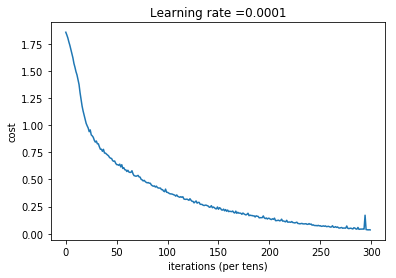

Parameters have been trained!
Train Accuracy: 0.999074
Test Accuracy: 0.725


In [27]:
parameters = model(X_train, Y_train, X_test, Y_test)

## Uploading Our Own Image

In [ ]:
import scipy
from PIL import Image
from scipy import ndimage

my_image = "fighton.jpg"

fname = "images/"+my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))


## Key Takeaways

- TensorFlow does a lot of the heavy lifting by abstracting away some steps and many lines of code
- Our model fits the training set well but performs relatively poorly on the test set - high variance
- We could optimize by using regularization (dropout or L2)